In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


In [177]:
file_path = "datasets/sports_betting_predictive_analysis.csv"

df = pd.read_csv(file_path)

print(df.head())

  Match_ID        Date       Sport             Home_Team  \
0   M00001  2024-01-24  Basketball  Gonzalezmouth Tigers   
1   M00002  2025-05-03  Basketball       Rothstad Wolves   
2   M00003  2025-04-10    Baseball      Aliciaport Lions   
3   M00004  2024-08-02      Tennis  Lake Samantha Eagles   
4   M00005  2024-10-05      Tennis    Brendanport Eagles   

               Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
0    Hernandezfurt Lions            3.62            3.99        NaN   
1    North Manuel Eagles            1.84             NaN        NaN   
2  West Gabrielton Lions            3.93            3.29        NaN   
3       Simonshire Lions            3.70            3.61        NaN   
4     Williamsfurt Bears            2.26            2.52        NaN   

      Predicted_Winner         Actual_Winner  
0  Hernandezfurt Lions   Hernandezfurt Lions  
1      Rothstad Wolves       Rothstad Wolves  
2     Aliciaport Lions      Aliciaport Lions  
3     Simonshire Lions  

In [178]:
print(df.info())
print()
print(df.describe())
print()
print(df['Home_Team'].value_counts().sum())
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_ID          1369 non-null   object 
 1   Date              1369 non-null   object 
 2   Sport             1369 non-null   object 
 3   Home_Team         1369 non-null   object 
 4   Away_Team         1369 non-null   object 
 5   Home_Team_Odds    1298 non-null   float64
 6   Away_Team_Odds    1282 non-null   float64
 7   Draw_Odds         498 non-null    float64
 8   Predicted_Winner  1369 non-null   object 
 9   Actual_Winner     1369 non-null   object 
dtypes: float64(3), object(7)
memory usage: 107.1+ KB
None

       Home_Team_Odds  Away_Team_Odds   Draw_Odds
count     1298.000000     1282.000000  498.000000
mean         3.069823        3.060031    3.103012
std          1.096600        1.087785    1.098248
min          1.200000        1.210000    1.200000
25%          2.1100

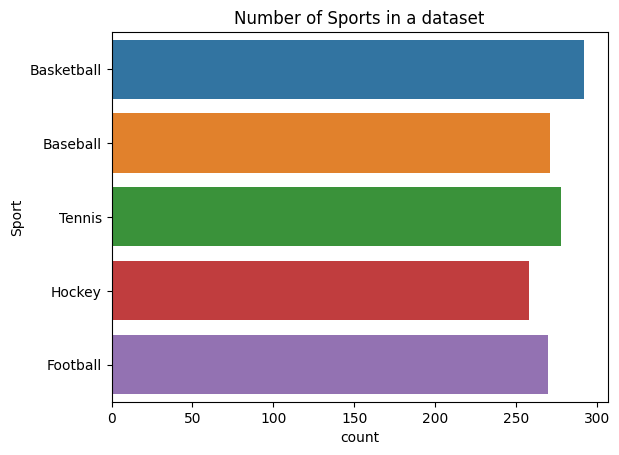

In [179]:
sns.countplot(y='Sport',data=df, hue='Sport')
plt.title("Number of Sports in a dataset")
plt.show()

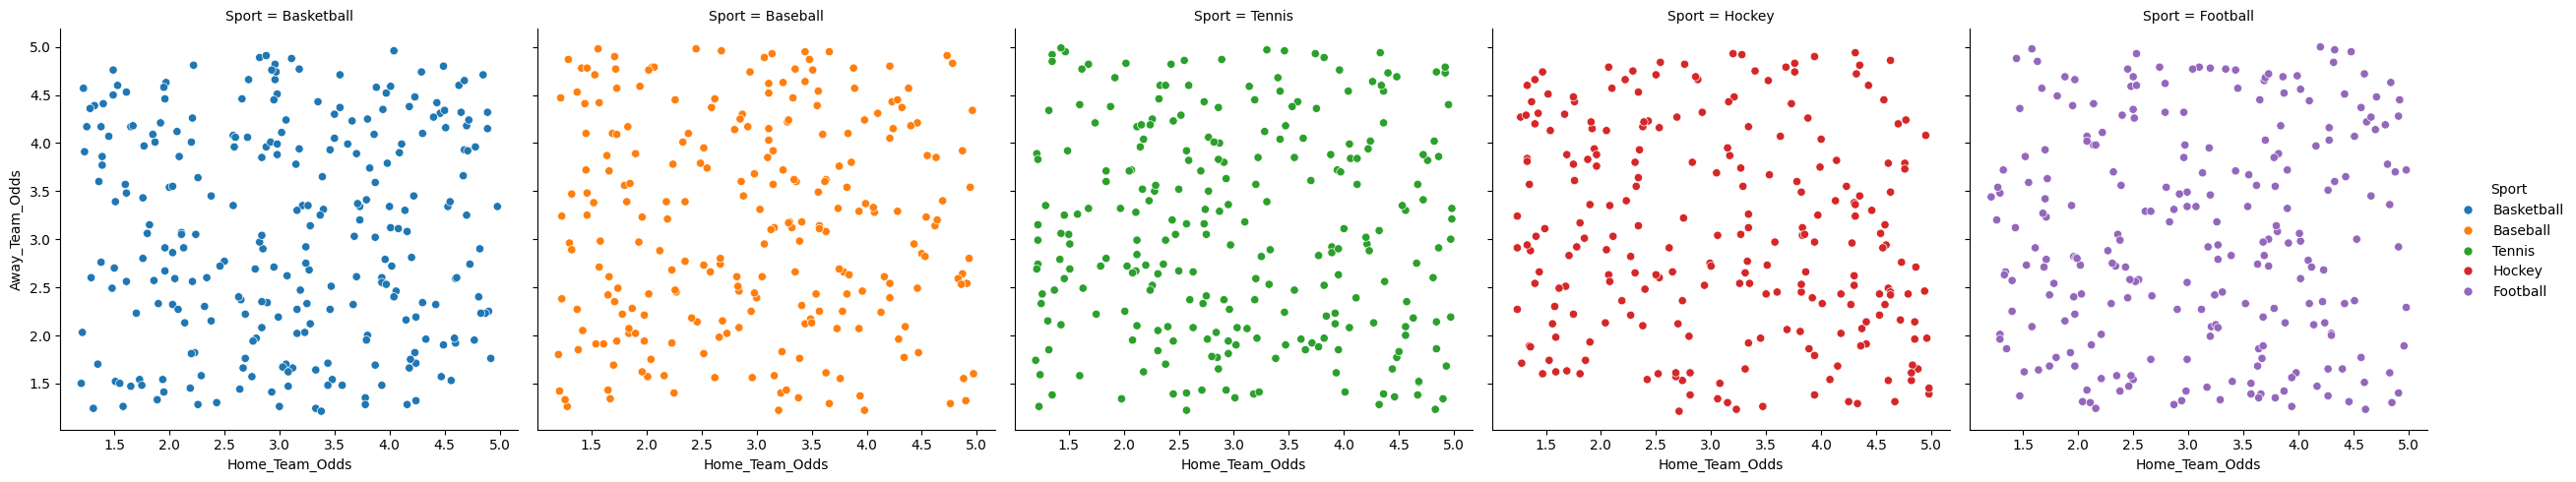

In [180]:
# sns.scatterplot(x='Home_Team_Odds',y='Away_Team_Odds', data=df, hue='Sport')
sns.relplot(x='Home_Team_Odds',y='Away_Team_Odds', data=df, kind='scatter', hue='Sport' ,col='Sport')
plt.show()

In [181]:
print(df.isna().any())

Match_ID            False
Date                False
Sport               False
Home_Team           False
Away_Team           False
Home_Team_Odds       True
Away_Team_Odds       True
Draw_Odds            True
Predicted_Winner    False
Actual_Winner       False
dtype: bool


In [182]:
#CLEANING AND PREPROCESSING

#Home_Team_Odds  Away_Team_Odds  Draw_Odds
features = ['Home_Team_Odds','Away_Team_Odds','Draw_Odds']

df['Away_Team_Odds'].fillna(value=0, inplace=True)
df['Home_Team_Odds'].fillna(value=0, inplace=True)

#GET THE MEAN FOR NAN DRAW VALUES
df['Draw_Odds'].fillna(value=((df['Home_Team_Odds'] + df['Away_Team_Odds']) / 2), inplace=True)

print(df.head())

  Match_ID        Date       Sport             Home_Team  \
0   M00001  2024-01-24  Basketball  Gonzalezmouth Tigers   
1   M00002  2025-05-03  Basketball       Rothstad Wolves   
2   M00003  2025-04-10    Baseball      Aliciaport Lions   
3   M00004  2024-08-02      Tennis  Lake Samantha Eagles   
4   M00005  2024-10-05      Tennis    Brendanport Eagles   

               Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
0    Hernandezfurt Lions            3.62            3.99      3.805   
1    North Manuel Eagles            1.84            0.00      0.920   
2  West Gabrielton Lions            3.93            3.29      3.610   
3       Simonshire Lions            3.70            3.61      3.655   
4     Williamsfurt Bears            2.26            2.52      2.390   

      Predicted_Winner         Actual_Winner  
0  Hernandezfurt Lions   Hernandezfurt Lions  
1      Rothstad Wolves       Rothstad Wolves  
2     Aliciaport Lions      Aliciaport Lions  
3     Simonshire Lions  

C:\Users\acer\AppData\Local\Temp\ipykernel_17104\78873516.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Away_Team_Odds'].fillna(value=0, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_17104\78873516.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [ ]:
#TRAINING MODEL

X = df[features]
y = df['Actual_Winner']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

lr = LogisticRegression(multi_class='multinomial', max_iter=500, solver='lbfgs')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("ACCURACY:",accuracy_score(y_test,y_pred))
print(y_pred[0:10])
print(y_test[0:10])
# train_accuracy = {}
# test_accuracy = {}
# neighbors = range(1,50)

# for neighbor in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=neighbor)
#     knn.fit(X_train, y_train)
#     train_accuracy[neighbor] = knn.score(X_train, y_train)
#     test_accuracy[neighbor] = knn.score(X_test, y_test)

# plt.plot(neighbors, train_accuracy.values())
# plt.plot(neighbors, test_accuracy.values())
# plt.show()

(1369, 3) (1369,)


f:\Github Projects\Sports-Betting-Prediction\venv\lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
f:\Github Projects\Sports-Betting-Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: could not convert string to float: 'Johnview Tigers'